In [1]:
import pandas as pd
import geopandas

import matplotlib.pyplot as plt
from cartopy import crs as ccrs

In [2]:
locs = pd.read_csv('../data/2023-06-18_locations_firstAuthor.csv')
locs.loc[locs.country_author == 'Russian Federation', 'country_author'] = 'Russia'
locs.loc[locs.country_author == 'United States', 'country_author'] = 'United States of America'
locs.loc[locs.country_author == 'Chili', 'country_author'] = 'Chile'

df = pd.read_csv('../data/beccs_in_pub_from_run_2023-06-18.csv')

df = df.merge(locs[['id', 'country_author', 'continent_author']], how='left', on='id')

In [5]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
w = world[['name', 'iso_a3']].rename(columns={'name': 'country_author', 'iso_a3': 'ISO3'})

centroids = pd.read_csv('/home/sarah/projects/map_cdr/data/countries_centroids.csv').rename(columns={'ISO': 'ISO2'})

iso = pd.read_csv('/home/sarah/projects/map_cdr/data/iso_codes.csv')
iso['Alpha-2 code'] = iso['Alpha-2 code'].apply(lambda x: x.replace('"', '').replace(' ', ''))
iso['Alpha-3 code'] = iso['Alpha-3 code'].apply(lambda x: x.replace('"', '').replace(' ', ''))
iso.rename(columns={'Alpha-2 code': 'ISO2',
                    'Alpha-3 code': 'ISO3'}, inplace=True)

w = w.merge(iso[['ISO2', 'ISO3']], on='ISO3', how='left')
w = w.merge(centroids[['longitude', 'latitude', 'ISO2']], on='ISO2', how='left')

w = w.drop_duplicates(subset=['country_author'])
w.loc[w['country_author'] == "Côte d'Ivoire", 'country_author'] = 'Cote d'Ivoire'
w.loc[w['country_author'] == 'Trinidad and Tobago', 'country_author'] = 'Trinidad & Tobago'
w.loc[w['country_author'] == 'Czechia', 'country_author'] = 'Czech Republic'
w.loc[w['country_author'] == 'Dem. Rep. Congo', 'country_author'] = 'Congo Democratic Republic'
w.loc[w['country_author'] == 'Brunei', 'country_author'] = 'Brunei Darussalam'
w.loc[w['country_author'] == 'Congo', 'country_author'] = 'Congo Brazzaville'
w.loc[w['country_author'] == 'Dominican Rep.', 'country_author'] = 'Dominican Republic'

In [8]:
counts_con = pd.DataFrame(df.country_author.value_counts()).reset_index()
counts_con.rename(columns={"country_author": "counts", "index": "country_author", }, inplace=True)
print(sum(counts_con["counts"]))
counts_con = counts_con.merge(w, on="country_author", how="left")
print(sum(counts_con["counts"]))
counts_con.drop_duplicates(inplace=True)
print(sum(counts_con["counts"]))

605
605
605


In [9]:
counts_con = pd.DataFrame(df.country_author.value_counts()).reset_index()
counts_con.rename(columns={"country_author": "counts", "index": "country_author", }, inplace=True)
counts_con = counts_con.merge(w, on="country_author", how="left")
counts_con.drop_duplicates(inplace=True)

counts_con.loc[counts_con.country_author == "Kosovo", "latitude"] = 42.2338796
counts_con.loc[counts_con.country_author == "Kosovo", "longitude"] = 20.25426036
counts_con.loc[counts_con.country_author == "France", "latitude"] = 46.978407
counts_con.loc[counts_con.country_author == "France", "longitude"] = 2.011695
counts_con.loc[counts_con.country_author == "Taiwan", "latitude"] = 23.6978
counts_con.loc[counts_con.country_author == "Taiwan", "longitude"] = 120.9605
counts_con.loc[counts_con.country_author == "Singapore", "latitude"] = 1.287953
counts_con.loc[counts_con.country_author == "Singapore", "longitude"] = 103.851784
counts_con.loc[counts_con.country_author == "Mauritius", "latitude"] = -20.20665
counts_con.loc[counts_con.country_author == "Mauritius", "longitude"] = 57.6755
counts_con.loc[counts_con.country_author == "Namibia", "latitude"] = -22.967062
counts_con.loc[counts_con.country_author == "Namibia", "longitude"] = 18.4929993
counts_con.loc[counts_con.country_author == "Seychelles", "latitude"] = -22.967062
counts_con.loc[counts_con.country_author == "Seychelles", "longitude"] = 18.4929993
counts_con.loc[counts_con.country_author == "Bahrain", "latitude"] = 25.9434256
counts_con.loc[counts_con.country_author == "Bahrain", "longitude"] = 50.6014985
counts_con.loc[counts_con.country_author == "Norway", "latitude"] = 64.5783089
counts_con.loc[counts_con.country_author == "Norway", "longitude"] = 17.888237

#bad_spain_record = counts_con.loc[(counts_con.country_author == "Spain")& (counts_con.latitude<40)].index
#counts_con.drop(index=bad_spain_record, inplace=True)

#counts_con = counts_con.loc[~pd.isna(counts_con.longitude)]
print(sum(counts_con["counts"]))

605


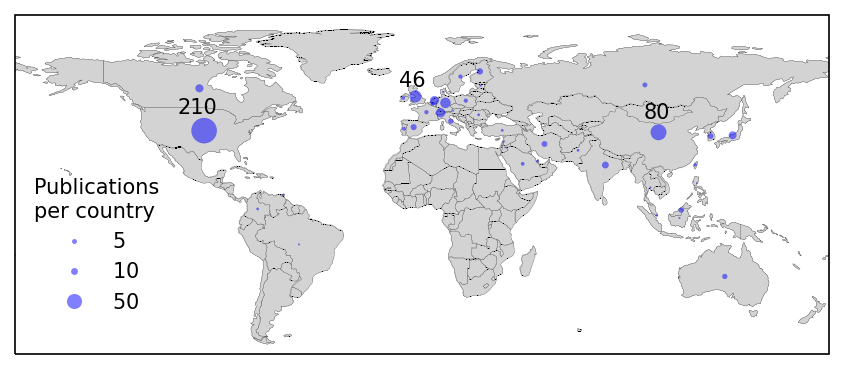

In [18]:
fig, ax = plt.subplots(dpi=150, figsize=(7, 16))
ax = plt.subplot(projection=ccrs.PlateCarree())
ax.set_aspect(aspect=1.)
ax.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())

ax.coastlines(lw=0.1)

usa_count = counts_con.loc[counts_con.country_author == "United States of America", "counts"].values[0]
uk_count = counts_con.loc[counts_con.country_author == "United Kingdom", "counts"].values[0]
china_count = counts_con.loc[counts_con.country_author == "China", "counts"].values[0]

for i, row in world.iterrows():
    ax.add_geometries(
        [row['geometry']], facecolor='lightgrey',
        crs=ccrs.PlateCarree(), lw=0.1, edgecolor="black"
    )
sc = ax.scatter(counts_con.longitude, counts_con.latitude,
                s=0.7 * counts_con.counts, zorder=10, color="blue", alpha=0.5, lw=0.1)
ax.text(-108, 46, usa_count, c="black", zorder=15)
ax.text(98, 44, china_count, c="black", zorder=15)
ax.text(-10, 58, uk_count, c="black", zorder=15)

plt.legend(*sc.legend_elements("sizes", num=[5, 10, 50], c='blue'),
           fontsize=10, loc="center left", bbox_to_anchor=(0, 0.32), frameon=False,
           title='Publications\nper country')

fig.savefig("figures/locations_first_author.png", bbox_inches="tight", facecolor='white', edgecolor='none')